<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
iris = sns.load_dataset('iris')
iris_original = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)
iris_original = iris.copy()

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

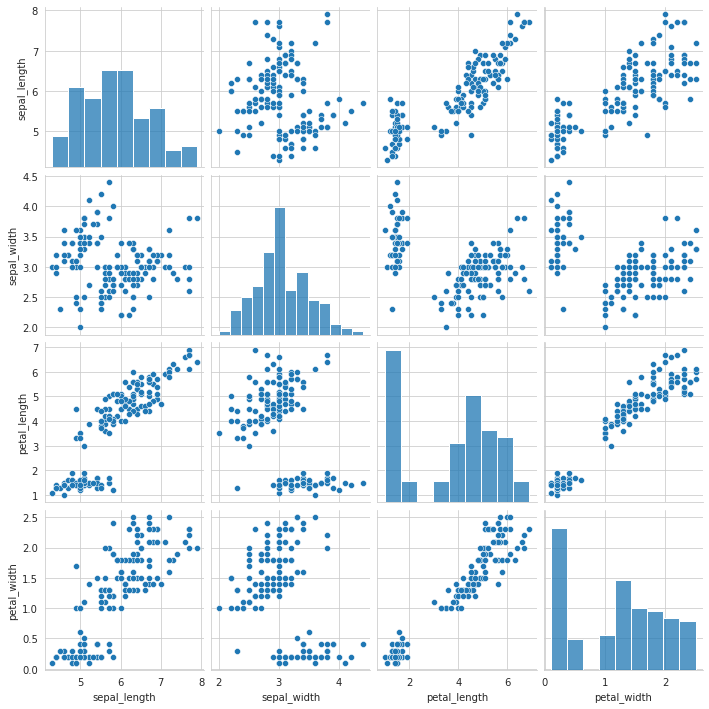

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** À primeira vista, parece existirem apenas 2 agrupamentos bem definidos.

A relação entrea o tamanho e a largura das sépalas parece ser bem esparçada.

A relação que mais chama atenção é a comparação entre o tamanho e a largura das pétalas, que parece ter uma correlação positiva bastante forte

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1

In [5]:
iris.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
dtype: bool

### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [ ]:
# resposta da questão 2.3

In [7]:
print(iris.info())
variaveis_numericas = iris.select_dtypes('float64').columns
print(variaveis_numericas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [8]:
for coluna in variaveis_numericas:
    media = iris[coluna].mean()
    desvio_padrao = iris[coluna].std()

    iris[f'{coluna}_std'] = iris[coluna].apply(lambda item: (item - media ) / desvio_padrao)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,5.1,3.5,1.4,0.2,-0.897674,1.015602,-1.335752,-1.311052
1,4.9,3.0,1.4,0.2,-1.139200,-0.131539,-1.335752,-1.311052
2,4.7,3.2,1.3,0.2,-1.380727,0.327318,-1.392399,-1.311052
3,4.6,3.1,1.5,0.2,-1.501490,0.097889,-1.279104,-1.311052
4,5.0,3.6,1.4,0.2,-1.018437,1.245030,-1.335752,-1.311052


In [9]:
print(f'A base de dados original tem {len(iris_original.columns)} colunas.')
print(f'Depois das transformações, a base de dados ficou com {len(iris.columns)} colunas.')
iris.drop(columns=variaveis_numericas, inplace=True)
print(f'Depois de descartar os dados desnecessários, a base de dados ficou com {len(iris.columns)} colunas.')
iris.columns

A base de dados original tem 4 colunas.
Depois das transformações, a base de dados ficou com 8 colunas.
Depois de descartar os dados desnecessários, a base de dados ficou com 4 colunas.


Index(['sepal_length_std', 'sepal_width_std', 'petal_length_std',
       'petal_width_std'],
      dtype='object')

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [ ]:
# resposta da questão 3.1

In [10]:
model = KMeans(n_clusters=10)
model = model.fit(iris)

In [11]:
model.__dict__

{'_algorithm': 'elkan',
 '_n_init': 10,
 '_n_threads': 2,
 '_tol': 9.933333333333333e-05,
 'algorithm': 'auto',
 'cluster_centers_': array([[ 2.12140867,  1.55093437,  1.49663097,  1.35653228],
        [ 0.01529668, -0.31508134,  0.45658008,  0.46792055],
        [-0.93018708,  1.05972279, -1.27910398, -1.22022645],
        [ 0.91377565,  0.21935132,  0.99679874,  1.38225633],
        [ 0.40388615, -1.53359979,  0.65321037,  0.4527605 ],
        [-1.39493454, -0.05056417, -1.33575163, -1.31876936],
        [ 0.81716501, -0.22331008,  0.6440838 ,  0.52564532],
        [ 1.9201365 , -0.30998294,  1.42110076,  1.03583907],
        [-0.52828025, -1.29217539,  0.03712087, -0.03771146],
        [-0.38011687,  2.26106915, -1.29528903, -1.19860128]]),
 'copy_x': True,
 'feature_names_in_': array(['sepal_length_std', 'sepal_width_std', 'petal_length_std',
        'petal_width_std'], dtype=object),
 'inertia_': 49.36575935222908,
 'init': 'k-means++',
 'labels_': array([2, 5, 5, 5, 2, 9, 2, 2, 5

In [12]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.describe().T

,count,mean,std,min,25%,50%,75%,max
cluster,150.0,4.206667,2.6069,0.0,2.0,4.0,6.0,9.0


In [13]:
clustered_iris = pd.concat([iris,clusters], axis=1)
clustered_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length_std,150.0,-5.684342e-16,1.0000,-1.863780,-0.897674,-0.052331,0.672249,2.483699
sepal_width_std,150.0,-7.815970e-16,1.0000,-2.425820,-0.590395,-0.131539,0.556746,3.080455
petal_length_std,150.0,-2.842171e-16,1.0000,-1.562342,-1.222456,0.335354,0.760211,1.779869
petal_width_std,150.0,-3.789561e-16,1.0000,-1.442245,-1.179859,0.132067,0.788031,1.706379
cluster,150.0,4.206667e+00,2.6069,0.000000,2.000000,4.000000,6.000000,9.000000


In [14]:
clustered_iris.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,cluster
0,-0.897674,1.015602,-1.335752,-1.311052,2
1,-1.139200,-0.131539,-1.335752,-1.311052,5
2,-1.380727,0.327318,-1.392399,-1.311052,5
3,-1.501490,0.097889,-1.279104,-1.311052,5
4,-1.018437,1.245030,-1.335752,-1.311052,2


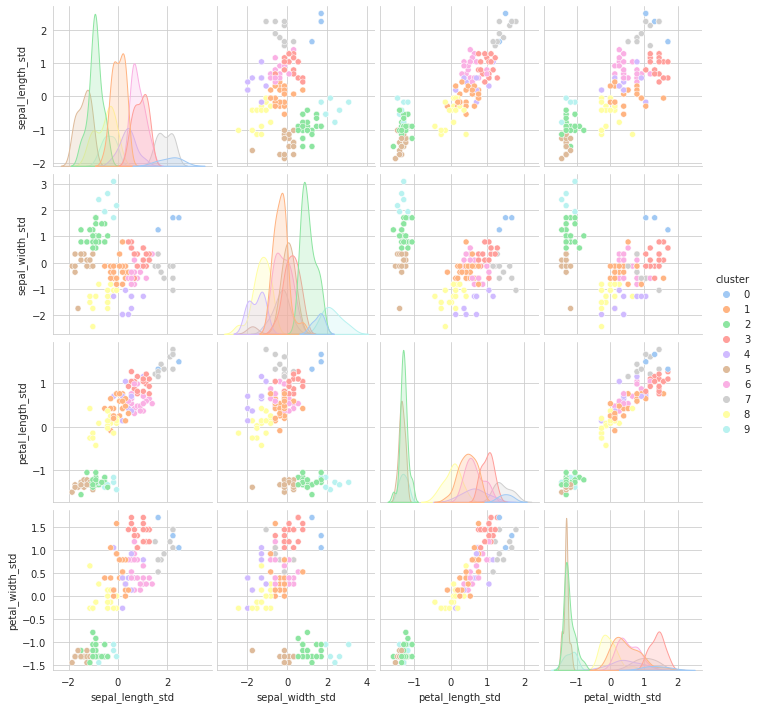

In [15]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_iris, hue='cluster', palette='pastel')

In [16]:
centroides = model.cluster_centers_
centroides = pd.DataFrame(centroides, columns=variaveis_numericas)
centroides.head()

,sepal_length,sepal_width,petal_length,petal_width
0,2.121409,1.550934,1.496631,1.356532
1,0.015297,-0.315081,0.456580,0.467921
2,-0.930187,1.059723,-1.279104,-1.220226
3,0.913776,0.219351,0.996799,1.382256
4,0.403886,-1.533600,0.653210,0.452761


### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [ ]:
# resposta da questão 3.2

In [17]:
wcss = []

for k in range(1,11):
    model = KMeans(n_clusters=k)
    model = model.fit(iris)
    wcss.append(model.inertia_)

print(wcss)

[596.0, 220.87929359858947, 138.88835971735142, 113.33192992467065, 90.44037903312878, 79.46554073755374, 71.33816009824544, 63.020836197897694, 54.80770665644036, 47.039403396908625]


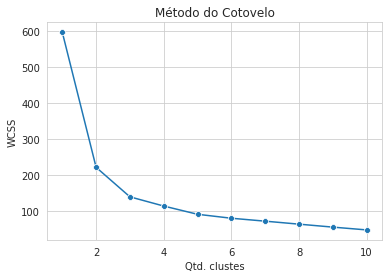

In [18]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(x=range(1,11), y=wcss, marker='8', palette='pastel')
    grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clustes')

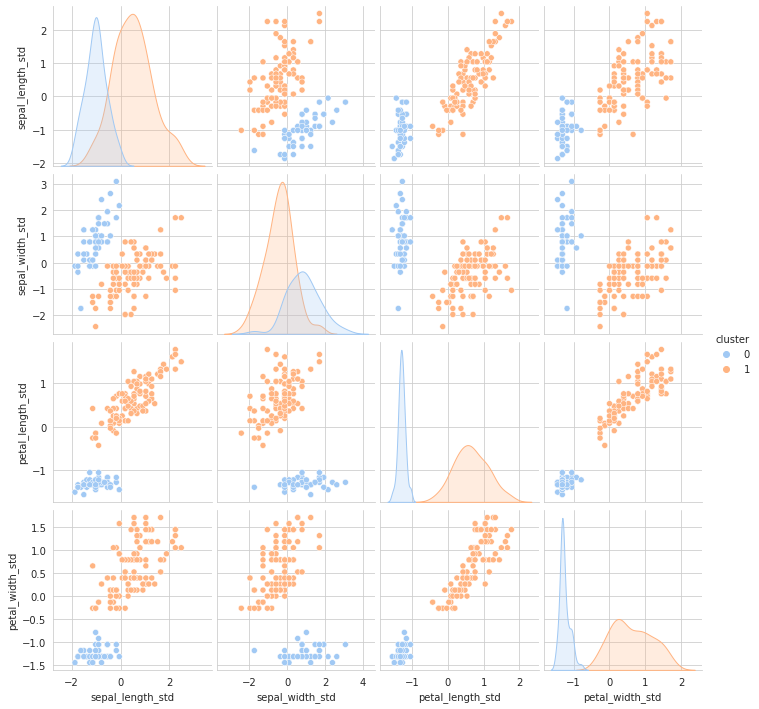

In [19]:
model = KMeans(n_clusters=2)
model = model.fit(iris)

clusters = model.labels_
clustered_iris = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_iris, hue='cluster', palette="pastel")

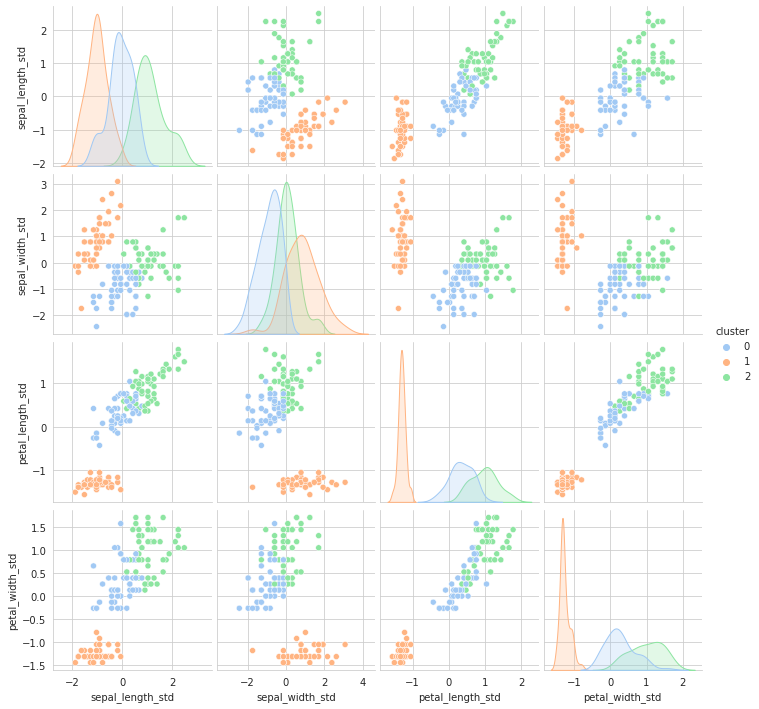

In [20]:
model = KMeans(n_clusters=3)
model = model.fit(iris)

clusters = model.labels_
clustered_iris = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_iris, hue='cluster', palette="pastel")

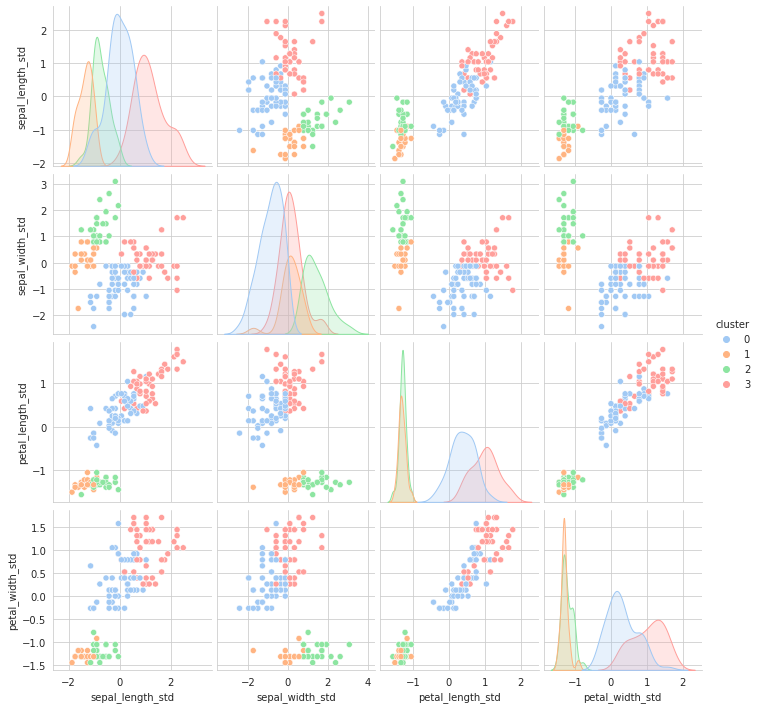

In [21]:
model = KMeans(n_clusters=4)
model = model.fit(iris)

clusters = model.labels_
clustered_iris = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_iris, hue='cluster', palette="pastel")

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [ ]:
# resposta da questão 3.3.a

In [22]:
model = KMeans(n_clusters=2)
model = model.fit(iris)
model.__dict__
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clustered_iris = pd.concat([iris_original,clusters], axis=1)
clustered_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

In [ ]:
# resposta da questão 3.3.b

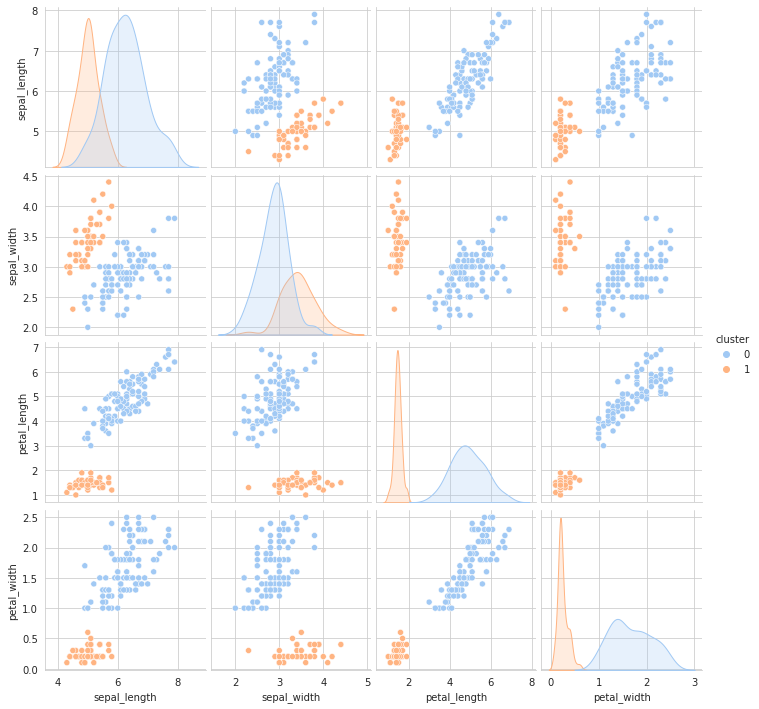

In [23]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_iris, hue='cluster', palette="pastel")

**Comentário:** Como esperado, foi confirmada a divisão das flores em dois agrupamentos bem distintos

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [ ]:
# resposta da questão 4.1

In [24]:
data = {
    'sepal_length': [5.1],
	'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2]
}

nova_iris = pd.DataFrame(data)
print(nova_iris)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2


In [25]:
for coluna in variaveis_numericas:
    media = iris_original[coluna].mean()
    desvio_padrao = iris_original[coluna].std()

    nova_iris[f'{coluna}_std'] = nova_iris[coluna].apply(lambda item: (item - media ) / desvio_padrao)

nova_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,5.1,3.5,1.4,0.2,-0.897674,1.015602,-1.335752,-1.311052


In [26]:
print(f'A base de dados original tem {len(iris_original.columns)} colunas.')
print(f'Depois das transformações, a base de dados ficou com {len(nova_iris.columns)} colunas.')
nova_iris.drop(columns=variaveis_numericas, inplace=True)
print(f'Depois de descartar os dados desnecessários, a base de dados ficou com {len(nova_iris.columns)} colunas.')
nova_iris.columns

A base de dados original tem 4 colunas.
Depois das transformações, a base de dados ficou com 8 colunas.
Depois de descartar os dados desnecessários, a base de dados ficou com 4 colunas.


Index(['sepal_length_std', 'sepal_width_std', 'petal_length_std',
       'petal_width_std'],
      dtype='object')

In [27]:
especie = model.predict(nova_iris)
print(f'O cluster predito para a nova espécie é o {especie[0]}.')

O cluster predito para a nova espécie é o 1.


---